# Homework 1:COVID-19 Cases Prediction(Regression)


Objective:
* Solve a **regression** problem with **deep neural networks** (DNN).
* Understand basic DNN training tips.
* Get familiar with **PyTorch**.

Learn [more](../slides/hw01.pdf).

## Data Exploration

### Data Visualization
There may be a linear relationship between the characteristics of different days.

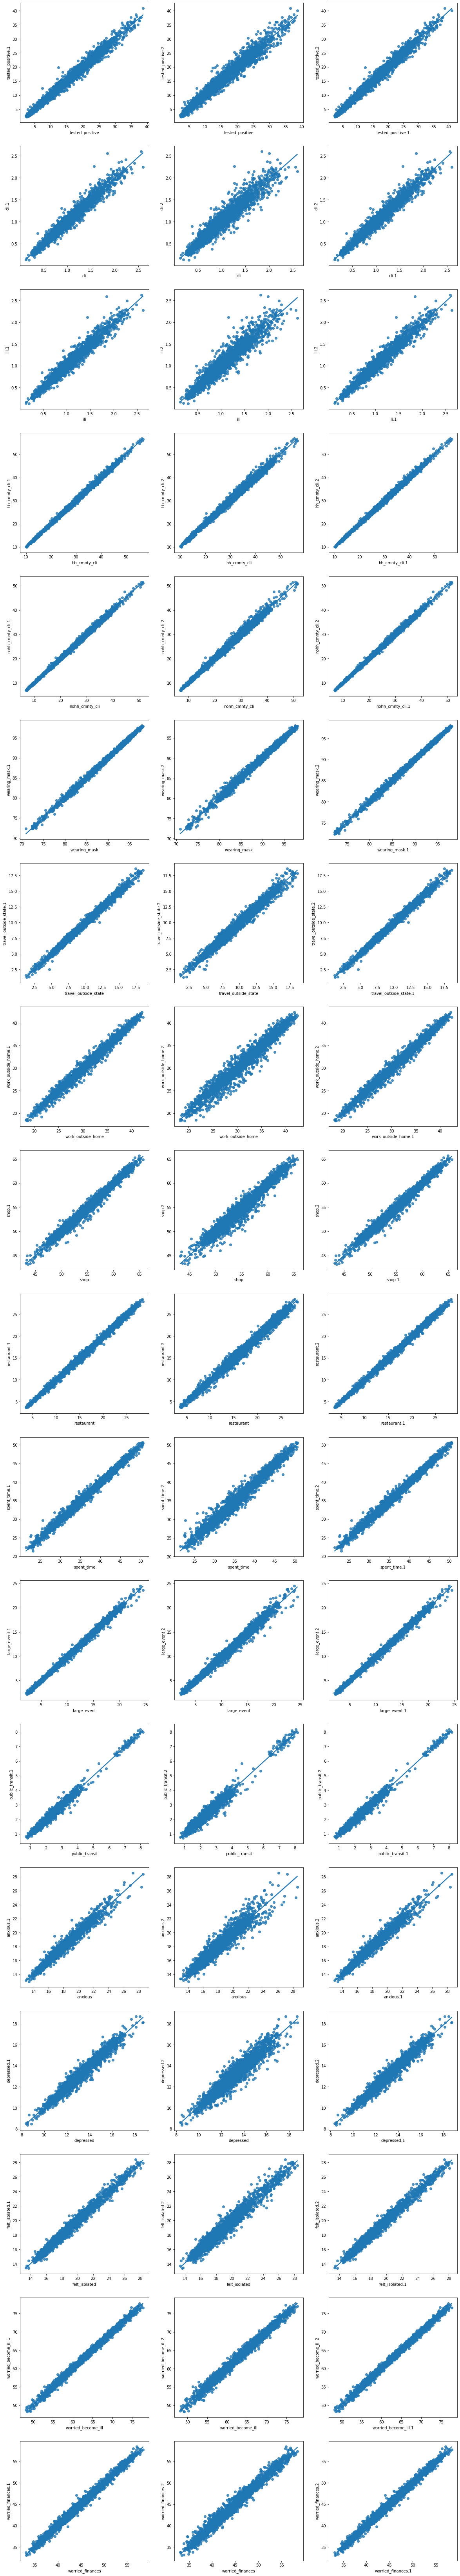

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tr_path = '../datasets/covid.train.csv'
tt_path = '../datasets/covid.test.csv'

def visual_data(path):
    data = pd.read_csv(path)
    fig,axs = plt.subplots(18, 3, figsize = (20, 120))
    sns.regplot(x="tested_positive", y="tested_positive.1", data=data, ax=axs[0][0])
    sns.regplot(x="tested_positive", y="tested_positive.2",data=data, ax=axs[0][1])
    sns.regplot(x="tested_positive.1", y="tested_positive.2", data=data, ax=axs[0][2])
    sns.regplot(x="cli", y="cli.1", data=data, ax=axs[1][0])
    sns.regplot(x="cli", y="cli.2", data=data, ax=axs[1][1])
    sns.regplot(x="cli.1", y="cli.2", data=data, ax=axs[1][2])
    sns.regplot(x="ili", y="ili.1", data=data, ax=axs[2][0])
    sns.regplot(x="ili", y="ili.2", data=data, ax=axs[2][1])
    sns.regplot(x="ili.1", y="ili.2", data=data, ax=axs[2][2])
    sns.regplot(x="hh_cmnty_cli", y="hh_cmnty_cli.1", data=data, ax=axs[3][0])
    sns.regplot(x="hh_cmnty_cli", y="hh_cmnty_cli.2", data=data, ax=axs[3][1])
    sns.regplot(x="hh_cmnty_cli.1", y="hh_cmnty_cli.2", data=data, ax=axs[3][2])
    sns.regplot(x="nohh_cmnty_cli", y="nohh_cmnty_cli.1", data=data, ax=axs[4][0])
    sns.regplot(x="nohh_cmnty_cli", y="nohh_cmnty_cli.2", data=data, ax=axs[4][1])
    sns.regplot(x="nohh_cmnty_cli.1", y="nohh_cmnty_cli.2", data=data, ax=axs[4][2])
    sns.regplot(x="wearing_mask", y="wearing_mask.1", data=data, ax=axs[5][0])
    sns.regplot(x="wearing_mask", y="wearing_mask.2", data=data, ax=axs[5][1])
    sns.regplot(x="wearing_mask.1", y="wearing_mask.2", data=data, ax=axs[5][2])
    sns.regplot(x="travel_outside_state", y="travel_outside_state.1", data=data, ax=axs[6][0])
    sns.regplot(x="travel_outside_state", y="travel_outside_state.2", data=data, ax=axs[6][1])
    sns.regplot(x="travel_outside_state.1", y="travel_outside_state.2", data=data, ax=axs[6][2])
    sns.regplot(x="work_outside_home", y="work_outside_home.1", data=data, ax=axs[7][0])
    sns.regplot(x="work_outside_home", y="work_outside_home.2", data=data, ax=axs[7][1])
    sns.regplot(x="work_outside_home.1", y="work_outside_home.2", data=data, ax=axs[7][2])
    sns.regplot(x="shop", y="shop.1", data=data, ax=axs[8][0])
    sns.regplot(x="shop", y="shop.2", data=data, ax=axs[8][1])
    sns.regplot(x="shop.1", y="shop.2", data=data, ax=axs[8][2])
    sns.regplot(x="restaurant", y="restaurant.1", data=data, ax=axs[9][0])
    sns.regplot(x="restaurant", y="restaurant.2",data=data, ax=axs[9][1])
    sns.regplot(x="restaurant.1", y="restaurant.2", data=data, ax=axs[9][2])
    sns.regplot(x="spent_time", y="spent_time.1", data=data, ax=axs[10][0])
    sns.regplot(x="spent_time", y="spent_time.2", data=data, ax=axs[10][1])
    sns.regplot(x="spent_time.1", y="spent_time.2", data=data, ax=axs[10][2])
    sns.regplot(x="large_event", y="large_event.1", data=data, ax=axs[11][0])
    sns.regplot(x="large_event", y="large_event.2", data=data, ax=axs[11][1])
    sns.regplot(x="large_event.1", y="large_event.2", data=data, ax=axs[11][2])
    sns.regplot(x="public_transit", y="public_transit.1", data=data, ax=axs[12][0])
    sns.regplot(x="public_transit", y="public_transit.2", data=data, ax=axs[12][1])
    sns.regplot(x="public_transit.1", y="public_transit.2", data=data, ax=axs[12][2])
    sns.regplot(x="anxious", y="anxious.1", data=data, ax=axs[13][0])
    sns.regplot(x="anxious", y="anxious.2", data=data, ax=axs[13][1])
    sns.regplot(x="anxious.1", y="anxious.2", data=data, ax=axs[13][2])
    sns.regplot(x="depressed", y="depressed.1", data=data, ax=axs[14][0])
    sns.regplot(x="depressed", y="depressed.2", data=data, ax=axs[14][1])
    sns.regplot(x="depressed.1", y="depressed.2", data=data, ax=axs[14][2])
    sns.regplot(x="felt_isolated", y="felt_isolated.1", data=data, ax=axs[15][0])
    sns.regplot(x="felt_isolated", y="felt_isolated.2", data=data, ax=axs[15][1])
    sns.regplot(x="felt_isolated.1", y="felt_isolated.2", data=data, ax=axs[15][2])
    sns.regplot(x="worried_become_ill", y="worried_become_ill.1", data=data, ax=axs[16][0])
    sns.regplot(x="worried_become_ill", y="worried_become_ill.2", data=data, ax=axs[16][1])
    sns.regplot(x="worried_become_ill.1", y="worried_become_ill.2", data=data, ax=axs[16][2])
    sns.regplot(x="worried_finances", y="worried_finances.1", data=data, ax=axs[17][0])
    sns.regplot(x="worried_finances", y="worried_finances.2", data=data, ax=axs[17][1])
    sns.regplot(x="worried_finances.1", y="worried_finances.2", data=data, ax=axs[17][2])

visual_data(tr_path)

## Data Preprocessing

## Feature Selection

Test in the following method:
* select one feature in the features with linear relationship
* select full features(preform best)
* only select tested_positives as features
* select states and tested_positives as features

In [84]:
''' select one feature in the features with linear relationship '''
features = list(range(42)) + list(range(46,48)) + [49] + list(range(51,55)) + list(range(57,60))  + list(range(64,66)) + [67] + list(range(69,73)) + list(range(75, 93))
''' select full features '''
# features = list(range(93))
''' only select tested_positives as features '''
# features = [57] + [75]
''' select states and tested_positives as features '''
# features = list(range(40)) + [57] + [75]


' select states and tested_positives as features '

## Model Selection

### Define the Dataset

In [85]:
import pandas as pd
import torch
from torch.utils.data import Dataset

class COVID19Dataset(Dataset):
    def __init__(self, path, mode='train', n=5, fold=0):
        self.mode = mode
        data = pd.read_csv(path).drop(['id'], axis=1)

        if mode == 'test':
            data = data.iloc[:, features]
            self.data = torch.FloatTensor(data.values)
        else:
            target = data.iloc[:, -1]
            data = data.iloc[:, features]

            if mode == 'train':
                indices = [i for i in range(len(data)) if i % n != fold]
            elif mode == 'dev':
                indices = [i for i in range(len(data)) if i % n == fold]

            self.data = torch.FloatTensor(data.iloc[indices].values)
            self.target = torch.FloatTensor(target.iloc[indices].values)

        # Normalize features
        self.data[:, 40:] = \
            (self.data[:, 40:] - self.data[:, 40:].mean(dim=0, keepdim=True)) \
            / self.data[:, 40:].std(dim=0, keepdim=True)

        self.dim = self.data.shape[1]

        print('Finished reading the {} set of COVID19 Dataset ({} samples found, each dim = {})'
              .format(mode, len(self.data), self.dim))

    def __getitem__(self, index):
        if self.mode in ['train', 'dev']:
            return self.data[index], self.target[index]
        else:
            return self.data[index]

    def __len__(self):
        return len(self.data)

In [86]:
from torch.utils.data import DataLoader

def trans_dataloader(path, mode, batch_size, n=5, fold=0):
    return DataLoader(COVID19Dataset(path, mode ,n, fold), batch_size, shuffle=(mode=='train'))

### Define the Model

In [87]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        return self.net(x).squeeze(1)

    def cal_loss(self, pred, target):
        return torch.sqrt(self.criterion(pred, target))

In [88]:
def create_optim(optim_fun, model_params, args):
    return getattr(torch.optim, optim_fun)(model_params, **args)

### Train, Develop and Test

In [89]:
def train(tr_set, dv_set, model, config, device, fold):
    n_epochs = config['n_epochs']
    optimizer = create_optim(config['optim'], model.parameters(), config['optim_args'])

    min_mse = 1000.
    mse_model = None
    loss_record = {'train': [], 'dev': []}
    early_stop_cnt = 0
    epoch = 0
    while epoch < n_epochs:
        model.train()
        for x, y in tr_set:
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device)
            pred = model(x)
            rmse_loss = model.cal_loss(pred, y)
            rmse_loss.backward()
            optimizer.step()
            loss_record['train'].append(rmse_loss.detach().cpu().item())

        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            min_mse = dev_mse
            print('fold = {:1d}, epoch = {:4d}, loss = {:.4f}'
                .format(fold, epoch + 1, min_mse))
            mse_model = model
            early_stop_cnt = 0
        else:
            early_stop_cnt += 1

        epoch += 1
        loss_record['dev'].append(dev_mse)
        if early_stop_cnt > config['early_stop']:
            break

    print('Finished training after {} epochs'.format(epoch))
    return min_mse, loss_record, mse_model

In [90]:
def dev(dv_set, model, device):
    model.eval()
    total_loss = 0
    for x, y in dv_set:
        x, y = x.to(device), y.to(device)
        with torch.no_grad():
            pred = model(x)
            rmse_loss = model.cal_loss(pred, y)
        total_loss += rmse_loss.detach().cpu().item() * len(x)
    total_loss = total_loss / len(dv_set.dataset)
    return total_loss

In [91]:
def test(tt_set, model, device):
    model.eval()
    preds = []
    for x in tt_set:
        x = x.to(device)
        with torch.no_grad():
            pred = model(x)
            preds += list(pred.detach().cpu())
    # index = [list(range(len(preds)))]
    pred_df = pd.DataFrame(preds, columns=['tested_positive']).astype("float").reset_index()
    pred_df.rename(columns={'index':'id'}, inplace = True)
    return pred_df

### Loss Visualization

In [92]:
import matplotlib.pyplot as plt

def plot_learning_curve(loss_record, title=''):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]
    plt.figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
    plt.ylim(0.0, 5.)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()


def plot_pred(dv_set, model, device, lim=35., preds=None, targets=None):
    ''' Plot prediction of your DNN '''
    if preds is None or targets is None:
        model.eval()
        preds, targets = [], []
        for x, y in dv_set:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():
                pred = model(x)
                preds.append(pred.detach().cpu())
                targets.append(y.detach().cpu())
        preds = torch.cat(preds, dim=0).numpy()
        targets = torch.cat(targets, dim=0).numpy()

    plt.figure(figsize=(5, 5))
    plt.scatter(targets, preds, c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='b')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()

### Start to Train

Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 77)
Finished reading the train set of COVID19 Dataset (2160 samples found, each dim = 77)
Finished reading the dev set of COVID19 Dataset (540 samples found, each dim = 77)
fold = 0, epoch =    1, loss = 17.5705
fold = 0, epoch =    2, loss = 17.0549
fold = 0, epoch =    3, loss = 16.3582
fold = 0, epoch =    4, loss = 15.3242
fold = 0, epoch =    5, loss = 13.7360
fold = 0, epoch =    6, loss = 11.2552
fold = 0, epoch =    7, loss = 8.1206
fold = 0, epoch =    8, loss = 6.1776
fold = 0, epoch =    9, loss = 4.9445
fold = 0, epoch =   10, loss = 4.4009
fold = 0, epoch =   11, loss = 4.1495
fold = 0, epoch =   12, loss = 3.9046
fold = 0, epoch =   13, loss = 3.6825
fold = 0, epoch =   14, loss = 3.4802
fold = 0, epoch =   15, loss = 3.2955
fold = 0, epoch =   16, loss = 3.1209
fold = 0, epoch =   17, loss = 2.9542
fold = 0, epoch =   18, loss = 2.8015
fold = 0, epoch =   19, loss = 2.6605
fold = 0, epoch =  

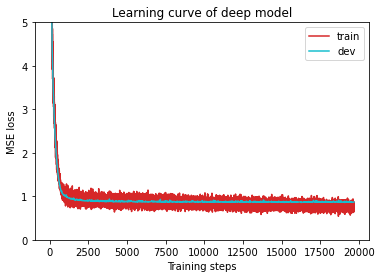

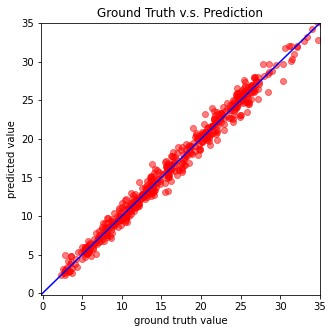

In [93]:
import os

def get_device():
    ''' Get device (if GPU is available, use GPU) '''
    return 'cuda' if torch.cuda.is_available() else 'cpu'

device = get_device()
os.makedirs('../models', exist_ok=True)
config = {
    'n_fold': 5,
    'n_epochs': 3000,                  # maximum number of epochs
    'batch_size': 128,                 # mini-batch size for dataloader
    'optim': 'SGD',                    # optimization algorithm (optimizer in torch.optim)
    'optim_args': {                    # hyper-parameters for the optimizer (depends on which optimizer you are using)
        'lr': 0.001,                   # learning rate of SGD
        'momentum': 0.9,
        'weight_decay': 1e-5
    },
    'early_stop': 200,                  # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': '../models/model.pth'  # your model will be saved here
}

min_model_loss = 100.
min_model_loss_record = None
min_dv_set = None
min_mse_model = None
tt_set = trans_dataloader(tt_path, 'test', config['batch_size'])
n_fold = config['n_fold']

for fold in range(n_fold):
    tr_set = trans_dataloader(tr_path, 'train', config['batch_size'], n_fold, fold)
    dv_set = trans_dataloader(tr_path, 'dev', config['batch_size'], n_fold, fold)

    model = NeuralNet(tr_set.dataset.dim).to(device)

    model_loss, model_loss_record, mse_model = train(tr_set, dv_set, model, config, device, fold)
    
    if min_model_loss > model_loss:
        min_model_loss = model_loss
        min_model_loss_record = model_loss_record
        min_dv_set = dv_set
        min_mse_model = mse_model
        
torch.save(min_mse_model.state_dict(), config['save_path'])
print('Best model has been saved, min_loss = {:.4f}.'.format(min_model_loss))

plot_learning_curve(min_model_loss_record, title='deep model')
plot_pred(min_dv_set, min_mse_model, device)  # Show prediction on the validation set

### Prediction

In [94]:
def save_pred(preds, w_path):
    ''' Save predictions to specified file '''
    preds.to_csv(w_path, index=False)

preds = test(tt_set, model, device)              # predict COVID-19 cases with your model
save_pred(preds, '../datasets/pred.csv')         # save prediction file to pred.csv

## Ensemble Generation

## Pipeline

## Scores

Private score: 1.41792

Public score: 1.45317